<a href="https://colab.research.google.com/github/lucastanger/realestate_investment_analysis/blob/main/realestate_investment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [22]:
# Read CSV Data

# data = pd.read_csv('/Users/stang/Downloads/Data.csv', sep=";", encoding="iso-8859-1")
data = pd.read_csv('Data.csv', sep=";", encoding="iso-8859-1")


In [ ]:
data

In [ ]:
data['Renoviert'].hist(bins=60)
plt.show()

In [44]:
corr_matrix = data.corr()
corr_matrix['Preis'].sort_values(ascending=False)

Preis                  1.000000
Wohnfläche in qm       0.740241
Erster Stock in qm     0.652158
Kellerfläche in qm     0.651032
Küchenqualität         0.642411
Garagenkapazitt        0.640781
Pool                   0.629721
Gebaut                 0.519263
Räume                  0.495667
Renoviert              0.479822
Grundstück in qm       0.314255
Zweiter Stock in qm    0.288142
Schlafzimmer           0.175599
Verkaufsjahr           0.023610
Zustand Fassade        0.015150
Verkaufsmonat         -0.002150
Zustand               -0.107618
Küchen                -0.114129
Name: Preis, dtype: float64

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

imputer.fit(corr_matrix)

corr_matrix_i = imputer.transform(corr_matrix)

# corr_matrix_i = pd.DataFrame(corr_matrix_i)

In [ ]:
# sns.clustermap(data=corr_matrix_i, annot=True, cmap='Greens')

plt.subplots(figsize=(20,15))

ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
)

ax.set_xticklabels(
    data.columns,
    rotation=45,
    horizontalalignment='right'
)

In [50]:
from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

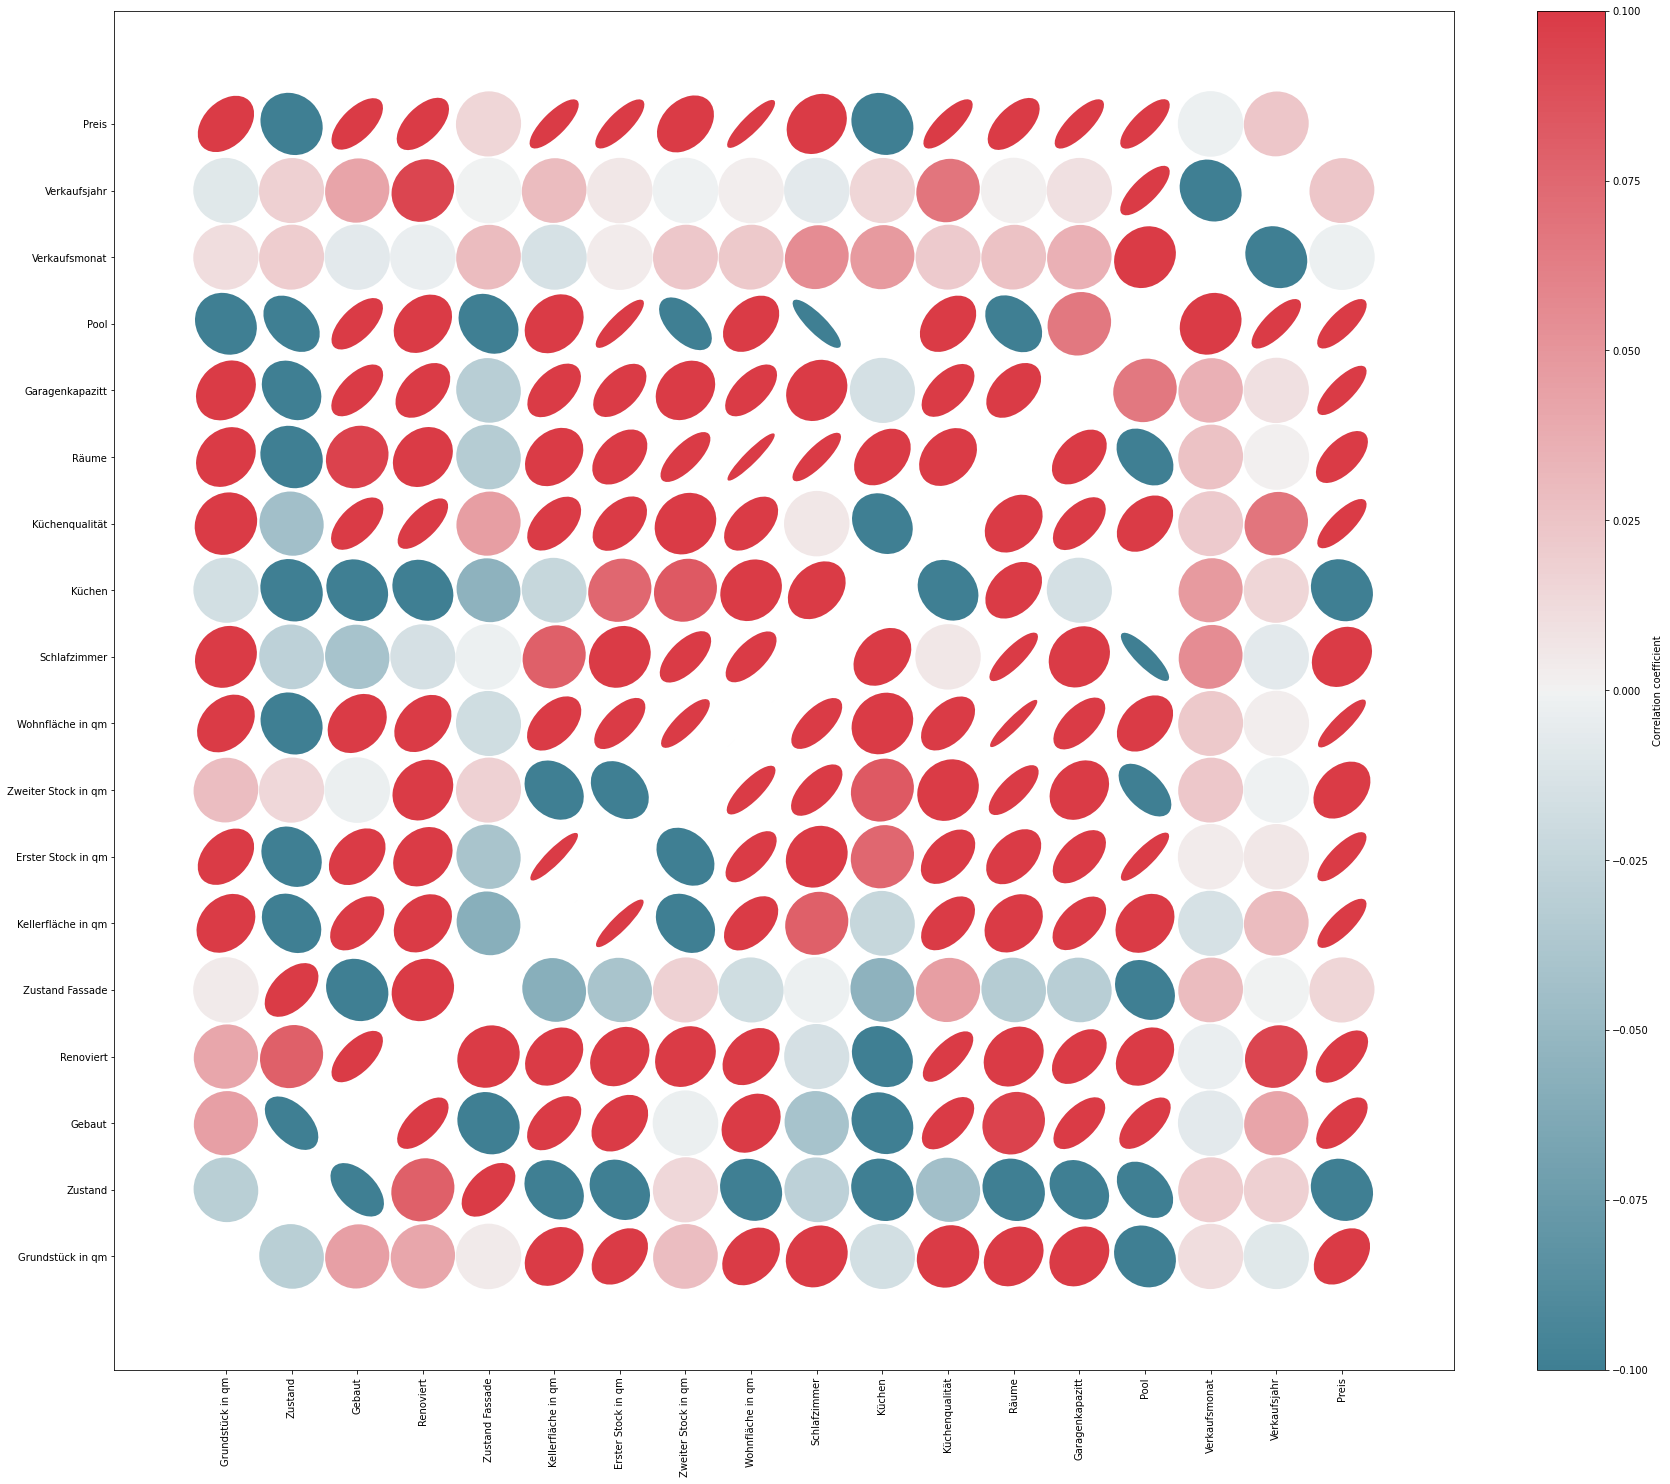

In [58]:


fig, ax = plt.subplots(figsize=(30,25))
m = plot_corr_ellipses(corr_matrix, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

In [41]:
corr_matrix_i

array([[ 1.00000000e+00, -3.10750384e-02,  4.49522174e-02,
         4.12744614e-02,  4.17448506e-03,  2.21740097e-01,
         3.11586569e-01,  2.85860754e-02,  2.61307495e-01,
         1.17993618e-01, -1.69043066e-02,  1.00093447e-01,
         1.89437460e-01,  1.84982926e-01, -1.19809630e-01,
         1.10526462e-02, -9.36790165e-03,  3.14254739e-01],
       [-3.10750384e-02,  1.00000000e+00, -4.28061018e-01,
         7.95749665e-02,  4.16441048e-01, -2.01566439e-01,
        -1.68418824e-01,  1.45309637e-02, -1.13136218e-01,
        -2.86129318e-02, -1.01594552e-01, -4.39752324e-02,
        -1.01141360e-01, -1.97198601e-01, -3.13314157e-01,
         1.98838032e-02,  1.80622583e-02, -1.07618442e-01],
       [ 4.49522174e-02, -4.28061018e-01,  1.00000000e+00,
         5.22958073e-01, -1.05288614e-01,  3.98530853e-01,
         3.00526832e-01, -2.72637171e-03,  2.12629371e-01,
        -4.10761278e-02, -1.22601745e-01,  4.78676275e-01,
         9.60583814e-02,  5.03489902e-01,  5.21536707e

<AxesSubplot:>

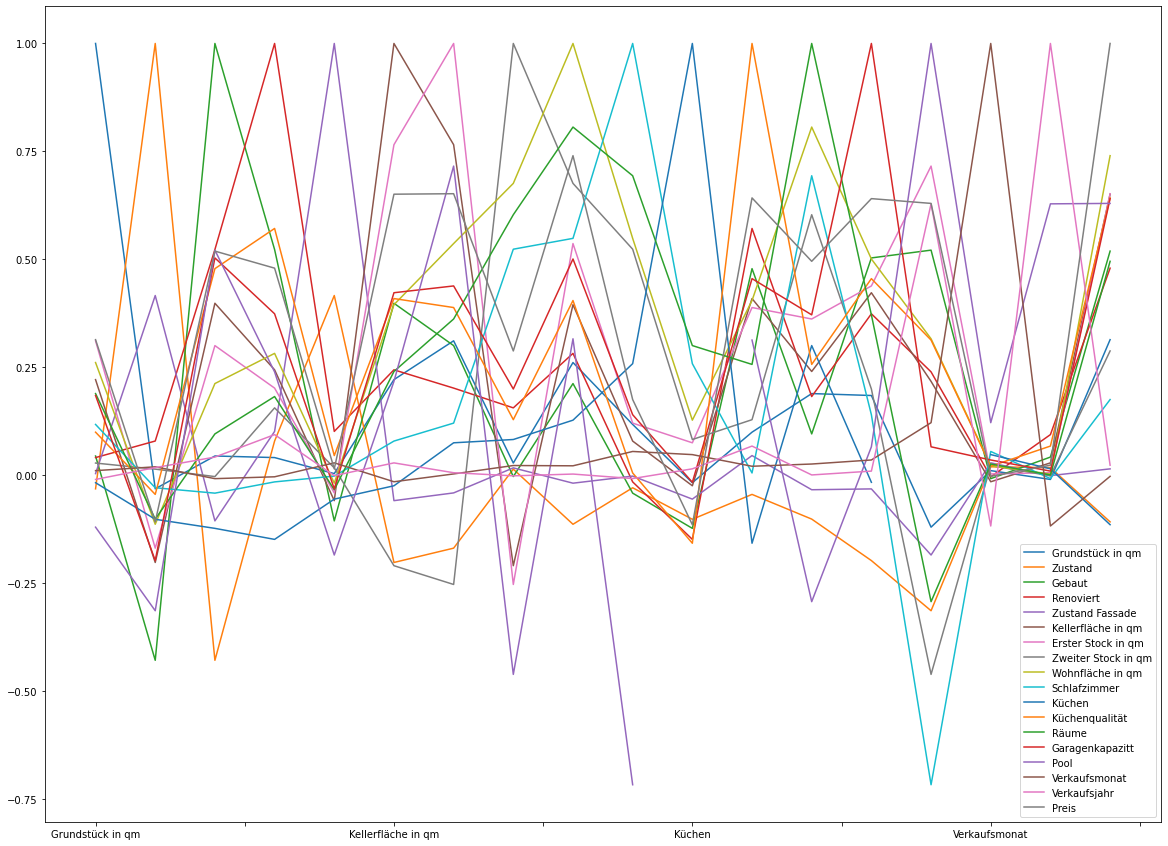

In [ ]:
corr_matrix = data.corr()
corr_matrix.plot(figsize=(20,15))

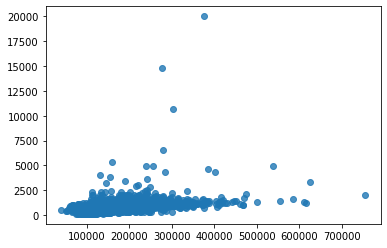

In [ ]:
plt.scatter(x=data['Preis'], y=data['Grundstück in qm'], alpha=0.8)
plt.show()

<AxesSubplot:xlabel='Preis', ylabel='Wohnfläche in qm'>

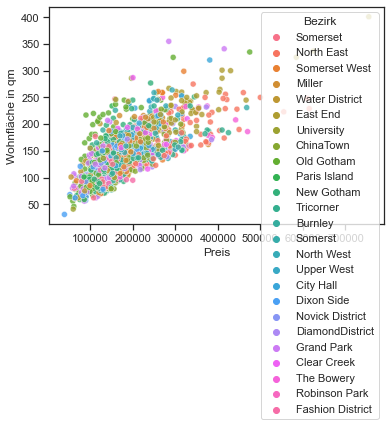

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.scatterplot(x=data['Preis'], y=data['Wohnfläche in qm'], alpha=0.8, hue=data['Bezirk'])

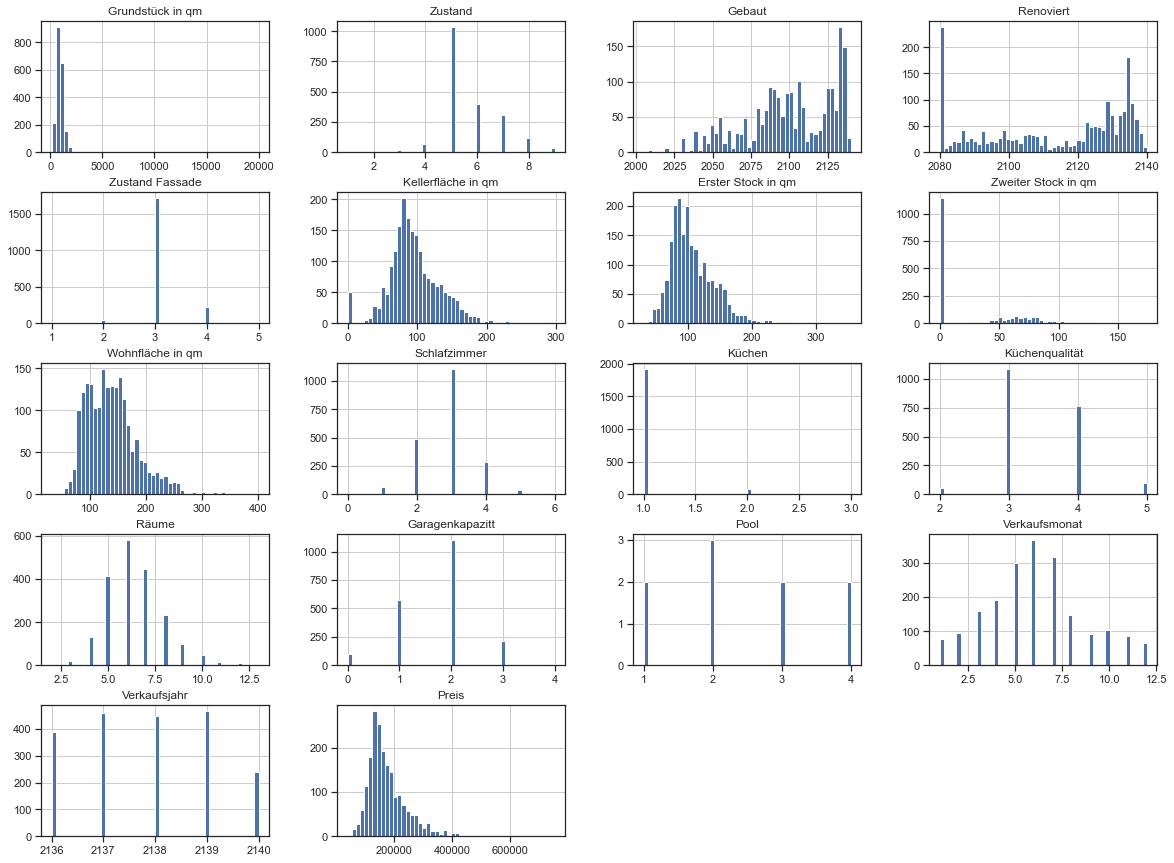

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='Grundstück in qm', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Gebaut', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Renoviert', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Kellerfläche in qm', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Wohnfläche in qm', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Räume', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Preis', ylabel='Grundstück in qm'>,
        <AxesSubplot:xlabel='Verkaufsjahr', ylabel='Grundstück in qm'>],
       [<AxesSubplot:xlabel='Grundstück in qm', ylabel='Gebaut'>,
        <AxesSubplot:xlabel='Gebaut', ylabel='Gebaut'>,
        <AxesSubplot:xlabel='Renoviert', ylabel='Gebaut'>,
        <AxesSubplot:xlabel='Kellerfläche in qm', ylabel='Gebaut'>,
        <AxesSubplot:xlabel='Wohnfläche in qm', ylabel='Gebaut'>,
        <AxesSubplot:xlabel='Räume', ylabel='Gebaut'>,
        <AxesSubplot:xlabel='Preis', ylabel='Gebaut'>,
       

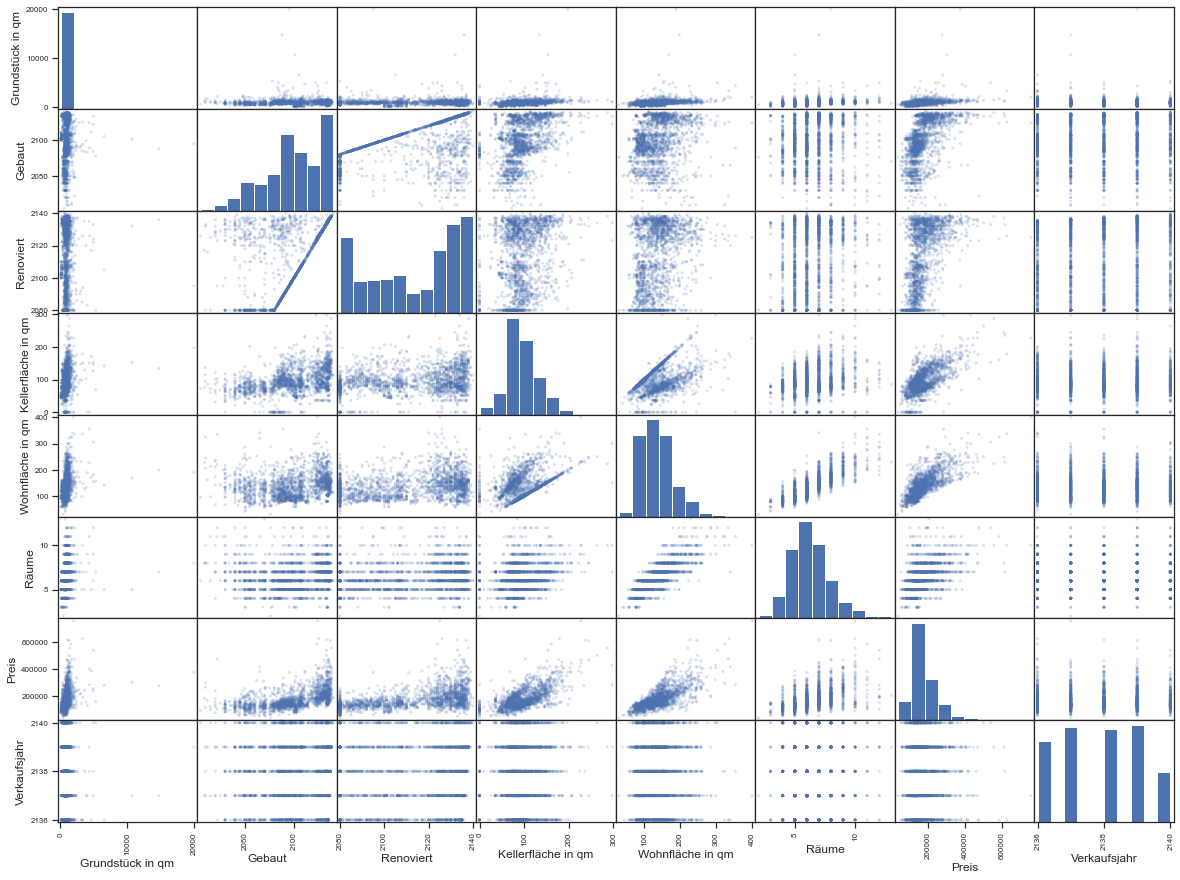

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Grundstück in qm', 'Gebaut', 'Renoviert', 'Kellerfläche in qm', 'Wohnfläche in qm', 'Räume', 'Preis', 'Verkaufsjahr']
scatter_matrix(data[attributes], figsize=(20,15), alpha=0.2)